In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kagglehub
import os

In [ ]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False


In [ ]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(23, activation='softmax')
])

In [ ]:
model.compile(optimizer=optimizers.Adam(),
              loss=losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [ ]:
def scheduler(epoch, lr):
    if epoch < 23:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [ ]:

lr_scheduler = LearningRateScheduler(scheduler)

In [ ]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [ ]:
path = kagglehub.dataset_download("vencerlanz09/sea-animals-image-dataste")


In [ ]:


train_generator = train_datagen.flow_from_directory(
    path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='training')

Found 10979 images belonging to 23 classes.


In [ ]:


train_generator = train_datagen.flow_from_directory(
    path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='training')

Found 10979 images belonging to 23 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    path,  # Replace with the path to your dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation')

Found 2732 images belonging to 23 classes.


In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=[checkpoint, lr_scheduler])

Epoch 1/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.1215 - loss: 3.1432

344/344 ━━━━━━━━━━━━━━━━━━━━ 2720s 8s/step - accuracy: 0.1215 - loss: 3.1430 - val_accuracy: 0.1567 - val_loss: 3.0066 - learning_rate: 0.0010
Epoch 2/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 2636s 8s/step - accuracy: 0.1415 - loss: 2.9875 - val_accuracy: 0.1475 - val_loss: 2.9172 - learning_rate: 0.0010
Epoch 3/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.1491 - loss: 2.9518

344/344 ━━━━━━━━━━━━━━━━━━━━ 2665s 8s/step - accuracy: 0.1491 - loss: 2.9519 - val_accuracy: 0.1570 - val_loss: 2.9019 - learning_rate: 0.0010
Epoch 4/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.1465 - loss: 2.9385

344/344 ━━━━━━━━━━━━━━━━━━━━ 2536s 7s/step - accuracy: 0.1465 - loss: 2.9385 - val_accuracy: 0.1633 - val_loss: 2.8698 - learning_rate: 0.0010
Epoch 5/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 2561s 7s/step - accuracy: 0.1500 - loss: 2.9267 - val_accuracy: 0.1625 - val_loss: 2.8466 - learning_rate: 0.0010
Epoch 6/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 2564s 7s/step - accuracy: 0.1501 - loss: 2.9092 - val_accuracy: 0.1603 - val_loss: 2.8387 - learning_rate: 0.0010
Epoch 7/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.1452 - loss: 2.8924

344/344 ━━━━━━━━━━━━━━━━━━━━ 2568s 7s/step - accuracy: 0.1452 - loss: 2.8924 - val_accuracy: 0.1702 - val_loss: 2.8247 - learning_rate: 0.0010
Epoch 8/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.1509 - loss: 2.8876

344/344 ━━━━━━━━━━━━━━━━━━━━ 2665s 8s/step - accuracy: 0.1509 - loss: 2.8876 - val_accuracy: 0.1728 - val_loss: 2.8232 - learning_rate: 0.0010
Epoch 9/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.1566 - loss: 2.8676

344/344 ━━━━━━━━━━━━━━━━━━━━ 2654s 8s/step - accuracy: 0.1565 - loss: 2.8677 - val_accuracy: 0.1739 - val_loss: 2.8012 - learning_rate: 0.0010
Epoch 10/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 2596s 8s/step - accuracy: 0.1483 - loss: 2.8755 - val_accuracy: 0.1713 - val_loss: 2.7997 - learning_rate: 0.0010
Epoch 11/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 2574s 7s/step - accuracy: 0.1592 - loss: 2.8562 - val_accuracy: 0.1636 - val_loss: 2.7907 - learning_rate: 0.0010
Epoch 12/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 2590s 8s/step - accuracy: 0.1446 - loss: 2.8588 - val_accuracy: 0.1640 - val_loss: 2.7830 - learning_rate: 0.0010
Epoch 13/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 2561s 7s/step - accuracy: 0.1542 - loss: 2.8478 - val_accuracy: 0.1676 - val_loss: 2.7610 - learning_rate: 0.0010
Epoch 14/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 2579s 7s/step - accuracy: 0.1546 - loss: 2.8436 - val_accuracy: 0.1665 - val_loss: 2.7644 - learning_rate: 0.0010
Epoch 15/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 2577s 7s/step - accuracy: 0.1515 - loss: 

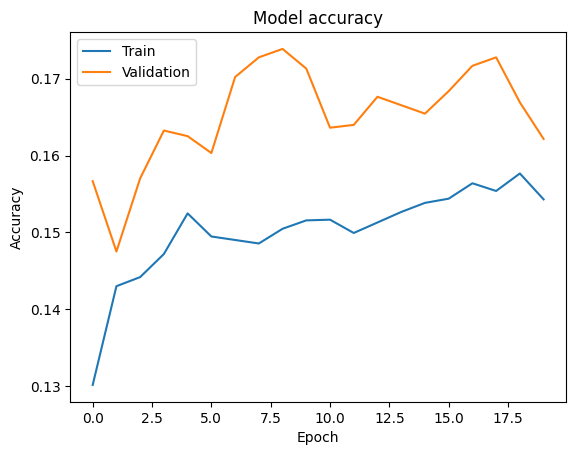

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

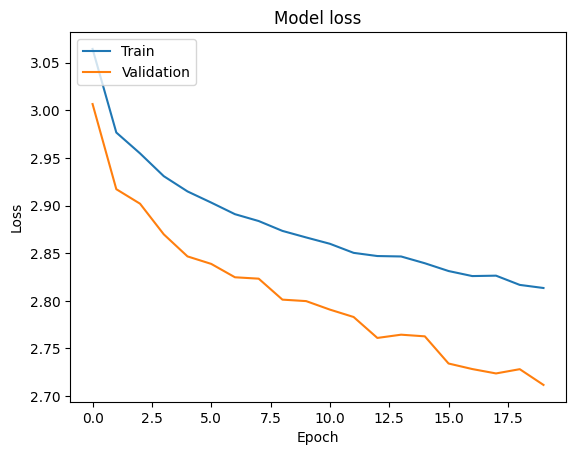

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.save('final_model.h5')

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image (replace 'path_to_image.jpg' with the actual image path)
img_path = 'img.jpg'  # Path to the image you want to predict
img = image.load_img(img_path, target_size=(224, 224))  # Resize image to match model input

# Convert the image to an array and preprocess it
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Rescale the image

# Predict the class probabilities
predictions = model.predict(img_array)

# Get the class with the highest probability
predicted_class = np.argmax(predictions, axis=1)

# Print the predicted class
print(f"Predicted Class: {predicted_class[0]}")  # You can map this to your actual class labels



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
Predicted Class: 21


In [ ]:
class_names = list(train_generator.class_indices.keys())

# Print the class names (which correspond to the folders in the dataset)
print("Class Names: ", class_names)

Class Names:  ['Clams', 'Corals', 'Crabs', 'Dolphin', 'Eel', 'Fish', 'Jelly Fish', 'Lobster', 'Nudibranchs', 'Octopus', 'Otter', 'Penguin', 'Puffers', 'Sea Rays', 'Sea Urchins', 'Seahorse', 'Seal', 'Sharks', 'Shrimp', 'Squid', 'Starfish', 'Turtle_Tortoise', 'Whale']


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image (replace 'path_to_image.jpg' with the actual image path)
img_path = 'dolphin.jpg'  # Path to the image you want to predict
img = image.load_img(img_path, target_size=(224, 224))  # Resize image to match model input

# Convert the image to an array and preprocess it
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Rescale the image

# Make the prediction
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)

# Define the class names array
class_names = [
    'Clams', 'Corals', 'Crabs', 'Dolphin', 'Eel', 'Fish', 'Jelly Fish',
    'Lobster', 'Nudibranchs', 'Octopus', 'Otter', 'Penguin', 'Puffers',
    'Sea Rays', 'Sea Urchins', 'Seahorse', 'Seal', 'Sharks', 'Shrimp',
    'Squid', 'Starfish', 'Turtle_Tortoise', 'Whale'
]

# Map the predicted class index to the class name
predicted_class_name = class_names[predicted_class_index[0]]

# Print the predicted class index and name
print(f"Predicted Class Index: {predicted_class_index[0]}")
print(f"Predicted Class Name: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
Predicted Class Index: 21
Predicted Class Name: Turtle_Tortoise
